<br><br><br><br>
<h4><b>Propensity Modelling</b></h4>
<br><br>

<pre>  
<b>1. Environment setup-used</b>
    
      M1-Macbook
<br>
<b>2. Notebook Flow</b>
    
      <b>2.1 File read</b>
    
              a. Reading generated training data
              b. Splitting of training data to X and Y
    
      <b>2.2 Exploration of Propensing Modelling</b>
    
              a. Pipeline {Train data + PCA + Logistic Regression } --> To estimate likelihood of Mutual_Fund sale
              b. Pipeline {StandardScaler (Train data) + PCA + Log Reg} --> To estimate likelihood of Mutual_Fund sale
              c. Pipeline {RobustScaled( Train data) + PCA + Log Reg } --> To estimate likelihood of Mutual_Fund sale

              d. Pipeline {Train data + PCA + XGBoost } --> To estimate likelihood of Mutual_Fund sale
              e. Pipeline {StandardScaler(Training data) + PCA + XGBoost} --> To estimate likelihood of Mutual_Fund sale
              f. Pipeline {RobustScaled( Training data) + PCA + XGBoost} --> To estimate likelihood of Mutual_Fund sale

              g. Finalizing which aforementioned pipeline works best
              
              h. Finalized pipeline -----> To estimate the likelihood of Mutual_Fund purchases
              i. Finalized pipeline -----> To estimate the likelihood of Credit_Card purchases 
              j. Finalized pipeline -----> To estimate the likelihood of Customer_Loan purchases 

      <b>2.3 Observation & Further exploration </b>
              a. Pipeline 5: {StandardScaler (Training data) + PCA + XGBoost } performed better than other pipelines
                 - It achieved accuracy ~100% on training data
                 - Precision & Recall also close to ~100 as it can be seen in Confusion matrix ( of training data)
              
              b. To avoid overfitting, directions like,
                 - adding more training data,
                 - adding L1, L2 regularization can be explored.
    
      <b>2.4 Prediction (or) Inference </b>
              a. Prepping Test datasets
              b. Predicting likelihood for buying Mutual Fund, Credit Card, Consumer loan on test data set
              c. Saving (or) Listing Client_IDs whom have higher likelihood to buy MF, CC, CL
              
<br>
</pre>

In [1]:
import numpy as np
import pandas as pd
import os

#----- Plotting & Visualization
import matplotlib.pyplot as plt
import seaborn as sb
bold_s = '\033[1m' #----- To print bold font
bold_e = '\033[0m'

#----- Pre-Processing & Feature Engineering
from Data_Analysis.utils import Preprocess, file_read
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.decomposition import PCA

#----- Stats
from scipy.stats import norm

#----- Modelling
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

#----- Evaluation Metric
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix


<br><br><br>
<h4><b>2.1 File Read</b></h4>
<pre>
              a. Reading generated training data
              b. Splitting of training data to X and Y
</pre>

In [2]:
#----- a. Reading generated dataset
train_data = pd.read_excel('./train_data.xlsx')

print(f'\n{bold_s}#----- Training dataset Shape: {train_data.shape}{bold_e}')


#----- Training dataset Shape: (949, 36)


In [3]:
#----- b. Splitting of training data to X and Y
target = ['Client', 'Sale_MF', 'Sale_CC', 'Sale_CL', 'Revenue_MF', 'Revenue_CC', 'Revenue_CL'  ]
input_var = list(train_data.columns)[1:-6]

train_y = train_data[target]
train_x = train_data[input_var]

print(f'\n{bold_s}#----- Training dataset X Shape: {train_x.shape}{bold_e}')
print(f'\n{bold_s}#----- Training dataset Y Shape: {train_y.shape}{bold_e}')


#----- Training dataset X Shape: (949, 29)

#----- Training dataset Y Shape: (949, 7)


<br><br><br>
<h4><b>2.1 Exploration of Propensing Modelling</b></h4>
<pre>
      
              a. Pipeline {Train data + PCA + Logistic Regression } --> To estimate likelihood of Mutual fund sale
              b. Pipeline {StandardScaled (Train data) + PCA + Log Reg} --> To estimate likelihood of Mutual fund sale
              c. Pipeline {RobustScaled( Train data) + PCA + Log Reg } --> To estimate likelihood of Mutual fund sale

              d. Pipeline {Train data + PCA + XGBoost } --> To estimate likelihood of Mutual fund sale
              e. Pipeline {StandardScaled(Training data) + PCA + XGBoost} --> To estimate likelihood of Mutual fund sale
              f. Pipeline {RobustScaled( Training data) + PCA + XGBoost} --> To estimate likelihood of Mutual fund sale

              g. Finalizing which aforementioned pipeline works best
              
              h. Finalized pipeline -----> To estimate the likelihood of Mutual fund purchases
              h. Finalized pipeline -----> To estimate the likelihood of Credit card purchases
              j. Finalized pipeline -----> estimating the likelihood of Consumer loan purchases 

</pre>

In [4]:
#----- Prepping dataset
#----- Applying Scalers

#----- Standard scaler
scaler_std = StandardScaler()
scaled_std_data_x = scaler_std.fit_transform(train_x)

#----- Robust scaler
scaler_robust = RobustScaler()
scaler_robust_data_x = scaler_robust.fit_transform(train_x)


In [5]:
#----- Diemnsionality Reduction via PCA
#----- For plain data
pca = PCA(0.99) 
pca_data = pca.fit_transform(train_x)
print(f'\n{bold_s}#----- PCA on training data{bold_e}')
print(f'(#training records, #pca components): {pca_data.shape}')

#----- For Standar Scaler applied data
pca_ss = PCA(0.99)
pca_ss_data = pca_ss.fit_transform(scaled_std_data_x)
print(f'\n{bold_s}#----- PCA on StandardScaler applied training data{bold_e}')
print(f'(#training records, #pca components): {pca_ss_data.shape}')


#----- For Robust Scaler applied data
pca_rs = PCA(0.99)
pca_rs_data = pca.fit_transform(scaler_robust_data_x)
print(f'\n{bold_s}#----- PCA on RobustScaler applied training data{bold_e}')
print(f'(#training records, #pca components): {pca_rs_data.shape}')
print(f'\n\n\n')


#----- PCA on training data
(#training records, #pca components): (949, 4)

#----- PCA on StandardScaler applied training data
(#training records, #pca components): (949, 23)

#----- PCA on RobustScaler applied training data
(#training records, #pca components): (949, 2)







#----- Training data's accuracy score on Pipeline - 1 for MF purchases : 0.797
#----- Training data's confusion matrix


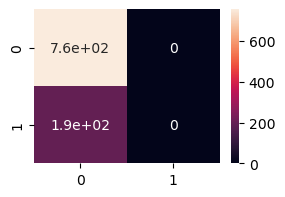


#----- Training data's accuracy score on Pipeline - 2 for MF purchases : 0.810
#----- Training data's confusion matrix


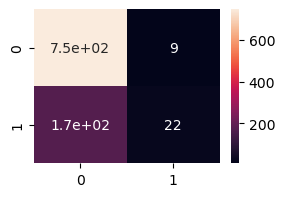


#----- Training data's accuracy score on Pipeline - 3 for MF purchases : 0.797
#----- Training data's confusion matrix


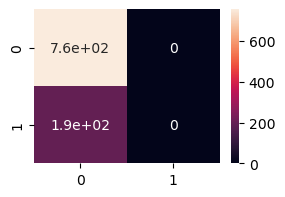

In [6]:
#----- a. Pipeline {Train data + PCA + Logistic Regression } --> To estimate likelihood of MF sale
#----- b. Pipeline {StandardScaled (Train data) + PCA + Log Reg} --> To estimate likelihood of MF sale
#----- c. Pipeline {RobustScaled( Train data) + PCA + Log Reg } --> To estimate likelihood of MF sale

pipeline_data = [pca_data, pca_ss_data, pca_rs_data]

for ind,data in enumerate(pipeline_data):
    #------ Modelling
    pipeline = LogisticRegression().fit(data, train_y['Sale_MF'])
    pipeline_pred = pipeline.predict(data)

    #----- Calculating accuracy score for training data
    accuracy = pipeline.score(data , train_y['Sale_MF']) 
    print(f'\n{bold_s}#----- Training data\'s accuracy score on Pipeline - {ind +1} for MF purchases : {accuracy:.3f}{bold_e}')

    #----- Evaluation
    plt.figure(figsize= (3,2))
    print(f'{bold_s}#----- Training data\'s confusion matrix{bold_e}')
    sb.heatmap(confusion_matrix(train_y['Sale_MF'], pipeline_pred), annot=True) 
    plt.show()


#----- Training data's accuracy score for Pipeline - 4 for MF purchases : 0.966
#----- Training data's Confusion matrix


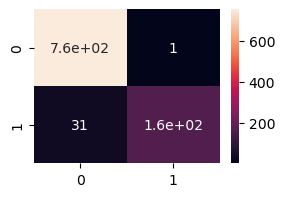


#----- Training data's accuracy score for Pipeline - 5 for MF purchases : 1.000
#----- Training data's Confusion matrix


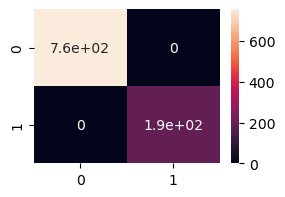


#----- Training data's accuracy score for Pipeline - 6 for MF purchases : 0.832
#----- Training data's Confusion matrix


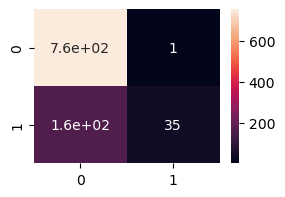

In [7]:
#----- d. Pipeline {Train data + PCA + XGBoost } --> To estimate likelihood of MF sale
#----- e. Pipeline {StandardScaled(Training data) + PCA + XGBoost} --> To estimate likelihood of MF sale
#------ f. Pipeline {RobustScaled( Training data) + PCA + XGBoost} --> To estimate likelihood of MF sale

pipeline_data = [pca_data, pca_ss_data, pca_rs_data]

for ind,data in enumerate(pipeline_data):
    #------ Modelling
    pipeline = XGBClassifier(min_child_weight = 2).fit(data, train_y['Sale_MF'])
    pipeline_pred = pipeline.predict(data)

    #----- Calculating accuracy score for training data
    accuracy = pipeline.score(data , train_y['Sale_MF']) 
    print(f'\n{bold_s}#----- Training data\'s accuracy score for Pipeline - {ind + 4} for MF purchases : {accuracy:.3f}{bold_e}')

    #----- Evaluation
    plt.figure(figsize= (3,2))
    print(f'{bold_s}#----- Training data\'s Confusion matrix{bold_e}')
    sb.heatmap(confusion_matrix(train_y['Sale_MF'], pipeline_pred), annot=True) 
    plt.show()

<br><br><br>
<pre>
<b>#-----  g. Finalizing which aforementioned pipeline works best for Mutual fund purchases
</b>
    From the above confusion matrix Pipeline 5: Standard Scalar ( Training data ) + PCA + XGBoot works the best
</pre><br><br><br>


#----- Training data's accuracy score on finalized pipeline fo MF Purchases: 1.000
#----- Training data's Confusion matrix


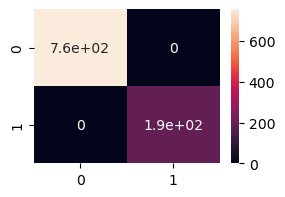

In [8]:
#----- h. Finalized pipeline -----> To estimate the likelihood of MF purchases

fin_pipeline_MF = XGBClassifier(min_child_weight = 2).fit(pca_ss_data, train_y['Sale_MF'])
pipeline_pred = fin_pipeline_MF.predict(pca_ss_data)

#----- Calculating accuracy score for training data
accuracy = fin_pipeline_MF.score(pca_ss_data , train_y['Sale_MF']) 
print(f'\n{bold_s}#----- Training data\'s accuracy score on finalized pipeline of MF Purchases: {accuracy:.3f}{bold_e}')

#----- Evaluation
plt.figure(figsize= (3,2))
print(f'{bold_s}#----- Training data\'s Confusion matrix{bold_e}')
sb.heatmap(confusion_matrix(train_y['Sale_MF'], pipeline_pred), annot=True) 
plt.show()



#----- Training data's accuracy score on finalized pipeline fo CC Purchases: 1.000
#----- Training data's Confusion matrix


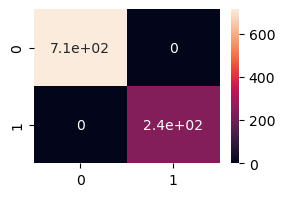

In [9]:
#----- h. Finalized pipeline -----> To estimate the likelihood of MF purchases

fin_pipeline_CC = XGBClassifier(min_child_weight = 2).fit(pca_ss_data, train_y['Sale_CC'])
pipeline_pred = fin_pipeline_CC.predict(pca_ss_data)

#----- Calculating accuracy score for training data
accuracy = fin_pipeline_CC.score(pca_ss_data , train_y['Sale_CC']) 
print(f'\n{bold_s}#----- Training data\'s accuracy score on finalized pipeline of CC Purchases: {accuracy:.3f}{bold_e}')

#----- Evaluation
plt.figure(figsize= (3,2))
print(f'{bold_s}#----- Training data\'s Confusion matrix{bold_e}')
sb.heatmap(confusion_matrix(train_y['Sale_CC'], pipeline_pred), annot=True) 
plt.show()



#----- Training data's accuracy score on finalized pipeline fo CL Purchases: : 1.000
#----- Training data's Confusion matrix


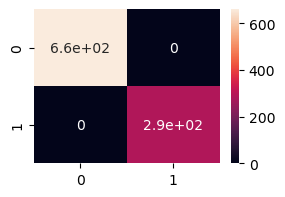

In [10]:
#----- j. Finalized pipeline -----> To estimate the likelihood of Customer Loan purchases

fin_pipeline_CL = XGBClassifier(min_child_weight = 3).fit(pca_ss_data, train_y['Sale_CL'])
pipeline_pred = fin_pipeline_CL.predict(pca_ss_data)

#----- Calculating accuracy score for training data
accuracy = fin_pipeline_CL.score(pca_ss_data , train_y['Sale_CL']) 
print(f'\n{bold_s}#----- Training data\'s accuracy score on finalized pipeline pf CL Purchases: : {accuracy:.3f}{bold_e}')

#----- Evaluation
plt.figure(figsize= (3,2))
print(f'{bold_s}#----- Training data\'s Confusion matrix{bold_e}')
sb.heatmap(confusion_matrix(train_y['Sale_CL'], pipeline_pred), annot=True) 
plt.show()


<br><br><br>
<h4><b>2.4 Prediction (or) Inference</b></h4>
<pre>
                  a. Prepping Test datasets
                  b. Predicting likelihood for buying Mutual Fund, Credit Card, Consumer loan on test data set
                  c. Saving (or) Listing Client_IDs whom have higher likelihood to buy MF, CC, CL
</pre>

In [11]:
#----- a. Prepping test dataaset

test_data = pd.read_excel('./test_data.xlsx')

#-----  Removing Client from test data
client_list = test_data['Client']
test_x = test_data.drop(columns = 'Client', axis = 'columns' )

print(f'\n{bold_s}#----- Testing dataset X Shape: {test_x.shape}{bold_e}')



#----- Testing dataset X Shape: (635, 29)


In [12]:
#-----  Applying finalised pipeline onto the testdata
scaled_std_data_test_x = scaler_std.transform(test_x)

pca_ss_data_test_x = pca_ss.transform(scaled_std_data_test_x)

print(f'\n{bold_s}#----- PCA on StandardScaler applied test data{bold_e}')
print(f'(#training records, #pca components): {pca_ss_data_test_x.shape}')


#----- PCA on StandardScaler applied test data
(#training records, #pca components): (635, 23)


In [13]:
#----- b. Predicting likelihood for buying Mutual Fund, Credit Card, Consumer loan on test data set

#----- Prediction for MF purchase 
predicted_test_MF = fin_pipeline_MF.predict(pca_ss_data_test_x)
print(f'\n{bold_s}#----- Estimated number of clients to purchase MF : {predicted_test_MF.sum()}{bold_e}')

#----- Prediction for CC purchase 
predicted_test_CC = fin_pipeline_CC.predict(pca_ss_data_test_x) 
print(f'\n{bold_s}#----- Estimated number of clients to purchase CC : {predicted_test_CC.sum()} {bold_e}')

#----- Prediction for CL purchase 
predicted_test_CL = fin_pipeline_CL.predict(pca_ss_data_test_x)
print(f'\n{bold_s}#----- Estimated number of clients to purchase CL : {predicted_test_CL.sum()} {bold_e}')



#----- Estimated number of clients to purchase MF : 53

#----- Estimated number of clients to purchase CC : 100 

#----- Estimated number of clients to purchase CL : 121 


In [20]:
#------ c. Saving (or) Listing Client_IDs whom have higher likelihood to buy MF, CC, CL

client_pred_MF = []
for ind,likelihood in enumerate(predicted_test_MF):
    if likelihood:
        client_pred_MF.append(client_list[ind])

client_pred_CC = []
for ind,likelihood in enumerate(predicted_test_CC):
    if likelihood:
        client_pred_CC.append(client_list[ind])

client_pred_CL = []
for ind,likelihood in enumerate(predicted_test_CL):
    if likelihood:
        client_pred_CL.append(client_list[ind])

with pd.ExcelWriter('./Higher_propensity_client.xlsx') as writer:
    
    pd.DataFrame(client_pred_MF, columns = ['Client']).to_excel(writer, sheet_name='Mutual_Funds', index = False)
    pd.DataFrame(client_pred_CC, columns = ['Client']).to_excel(writer, sheet_name='Credit_Card', index = False)
    pd.DataFrame(client_pred_CL, columns = ['Client']).to_excel(writer, sheet_name='Customer_Loan', index = False)
    